In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.model_selection import ParameterGrid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [42]:
train = pd.read_csv("training.csv")
test = pd.read_csv("test.csv")

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

In [45]:
train.isna().sum()

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentA

In [46]:
train[["VehYear", "VehicleAge"]].corr()

,VehYear,VehicleAge
VehYear,1.000000,-0.957957
VehicleAge,-0.957957,1.000000


_No need to keep both features as they describe the same charateristic of the vehicle_

In [47]:
train[['MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice']].corr()

,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice
MMRAcquisitionAuctionAveragePrice,1.000000,0.990347,0.910391,0.910187,0.937817,0.932492,0.871755
MMRAcquisitionAuctionCleanPrice,0.990347,1.000000,0.902718,0.918242,0.923610,0.932114,0.860716
MMRAcquisitionRetailAveragePrice,0.910391,0.902718,1.000000,0.990201,0.851647,0.849407,0.913108
MMRAcquisitonRetailCleanPrice,0.910187,0.918242,0.990201,1.000000,0.846914,0.855689,0.903188
MMRCurrentAuctionAveragePrice,0.937817,0.923610,0.851647,0.846914,1.000000,0.990329,0.915073
MMRCurrentAuctionCleanPrice,0.932492,0.932114,0.849407,0.855689,0.990329,1.000000,0.908669
MMRCurrentRetailAveragePrice,0.871755,0.860716,0.913108,0.903188,0.915073,0.908669,1.000000


_All these "MMR..." features are highly correlated between each other, so I decided to replace them with only one called "PriceDiff"._

In [6]:
train["PriceDiff"] = train["VehBCost"] - train["MMRAcquisitionAuctionAveragePrice"]

C:\Users\getto\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\getto\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


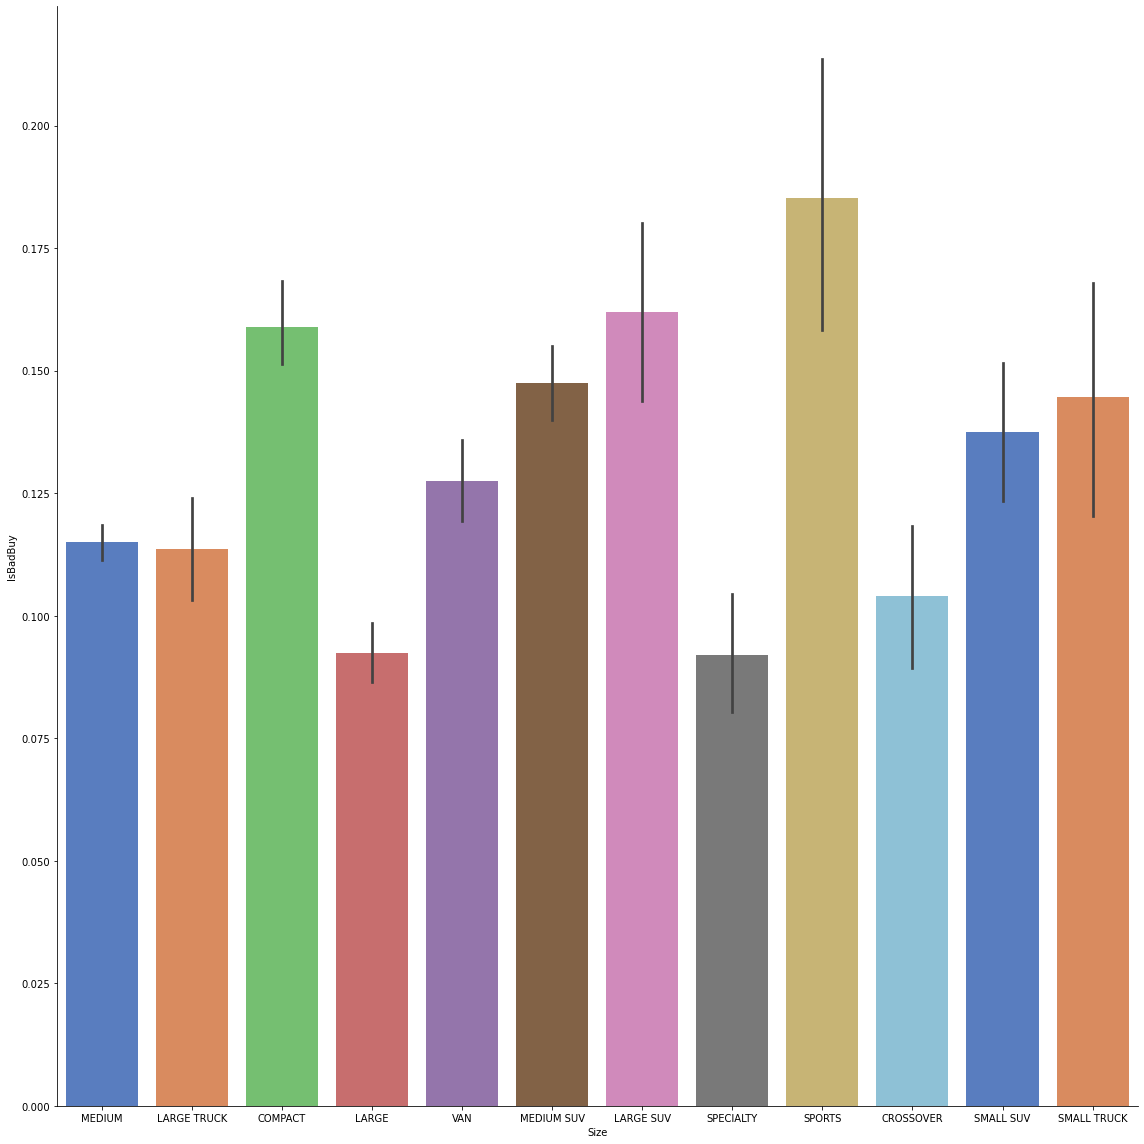

In [48]:
g = sns.factorplot(x="Size",y="IsBadBuy", data=train, kind="bar", size = 16 , 
palette = "muted")

C:\Users\getto\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\getto\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


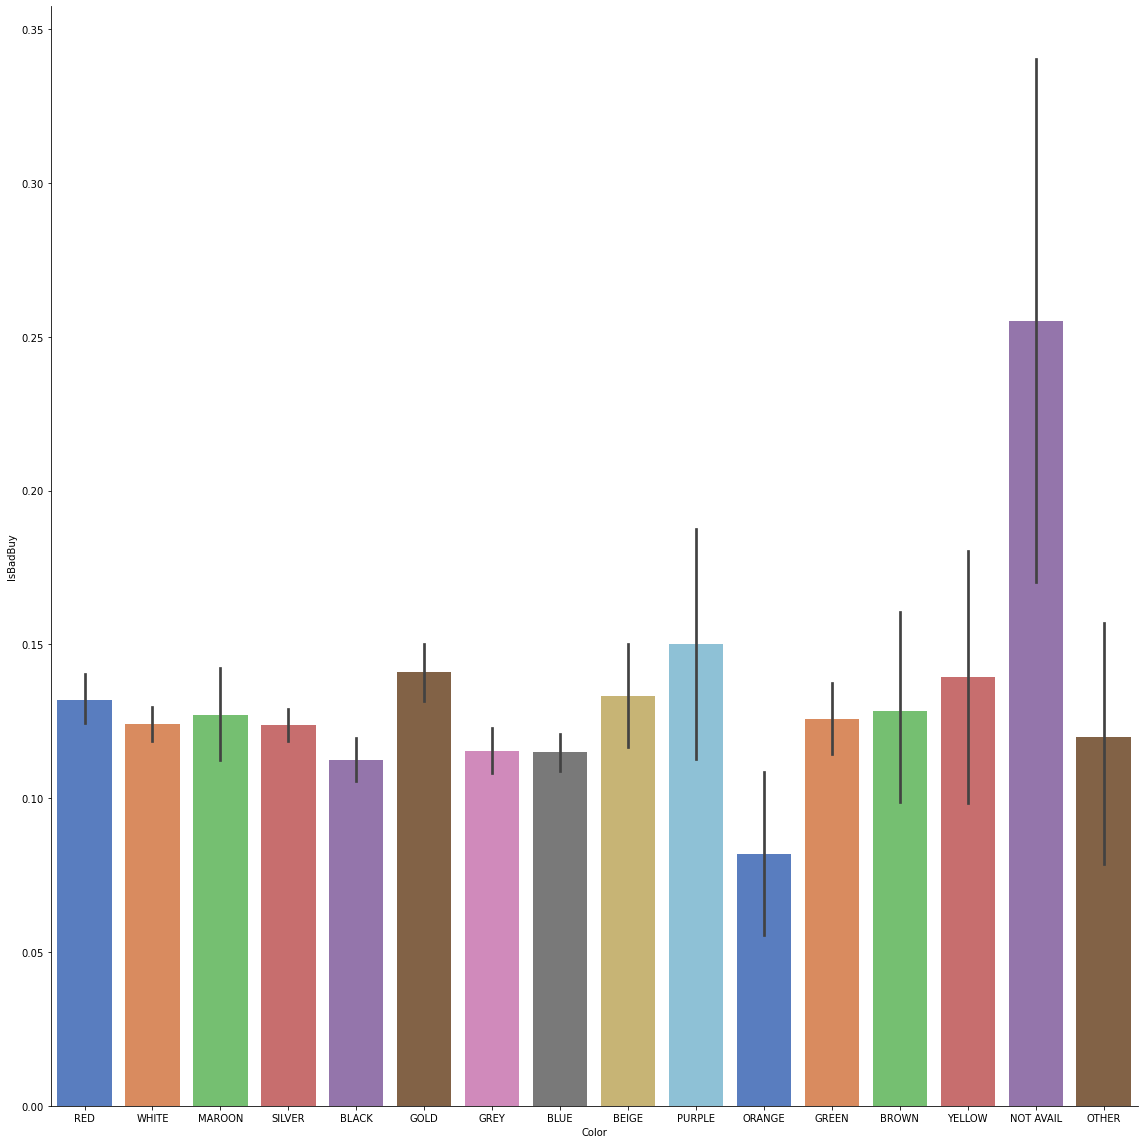

In [8]:
g = sns.factorplot(x="Color",y="IsBadBuy", data=train, kind="bar", size = 16 , 
palette = "muted")

_Some of the categorical features I decided to drop because of their's high variery of unique values (Model, SubModel, VNZIP1), the others have too much NaN values (AUCGUART, PRIMEUNIT have ~69500 of these).
I've tried different sets of features (with/without Color, different combinations of "MMR..." features), but the set below showed the best result._

In [9]:
train = train.drop(columns = ["RefId", "PurchDate", "VehYear", "Nationality", "WheelTypeID", "Trim",
                     "SubModel",'Model', "PRIMEUNIT", "BYRNO", 'VNZIP1', 'VNST', "AUCGUART", 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'Color'])
train["Transmission"] = train["Transmission"].replace(to_replace = "Manual", value = "MANUAL")
train["Size"] = train["Size"].fillna("MEDIUM")
train["Transmission"] = train["Transmission"].fillna("AUTO")
train["TopThreeAmericanName"] = train["TopThreeAmericanName"].fillna("OTHER")
train = pd.get_dummies(train,prefix=['Auction', "Transmission", "Make", "WheelType", "Size", "TopThreeAmericanName"], columns = ['Auction', "Transmission", "Make", "WheelType", "Size", "TopThreeAmericanName"])

In [11]:
train = train.dropna()

## RandomForestClassifier

In [12]:
X, X_val, y, y_val = train_test_split(
    train.drop(columns=['IsBadBuy']), train["IsBadBuy"], test_size=0.25)

In [13]:
param_grid = {
    'max_depth': range(1, 7),
    'n_estimators': range(1, 101, 5)
}

rfc = RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X, y)
print(CV_rfc.best_params_)

{'max_depth': 3, 'n_estimators': 1}


In [14]:
print("Accuracy score for RandomForest: ", accuracy_score(y_val, CV_rfc.predict(X_val)))
print("Recall score for RandomForest: ", recall_score(y_val, CV_rfc.predict(X_val)))
print("F1 score for RandomForest", f1_score(y_val, CV_rfc.predict(X_val)))

Accuracy score for RandomForest:  0.8785769104264883
Recall score for RandomForest:  0.0
F1 score for RandomForest 0.0


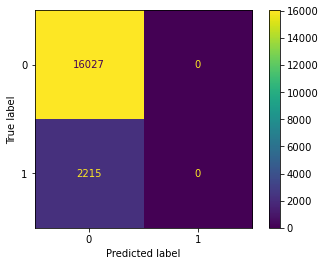

In [15]:
matrix = confusion_matrix(y_val, CV_rfc.predict(X_val))
disp = ConfusionMatrixDisplay(matrix)
disp.plot()

_Although this model shows decent accuracy, it has zero recall and f1 score. This happened because this dataset is imbalanced (~88% of purchases are marked as good, target value is 0)._

## DecisionTreeClassifier

In [16]:
param_grid = {
    'max_depth': range(1, 15),
}

tree = DecisionTreeClassifier()
CV_tree = GridSearchCV(estimator=tree, param_grid=param_grid, cv= 5)
CV_tree.fit(X, y)
print(CV_tree.best_params_)

{'max_depth': 5}


In [17]:
print("Accuracy score for DecisionTree: ", accuracy_score(y_val, CV_tree.predict(X_val)))
print("Recall score for DecisionTree: ", recall_score(y_val, CV_tree.predict(X_val)))
print("F1 score for DecisionTree", f1_score(y_val, CV_tree.predict(X_val)))

Accuracy score for DecisionTree:  0.897544128933231
Recall score for DecisionTree:  0.20857787810383746
F1 score for DecisionTree 0.3308270676691729


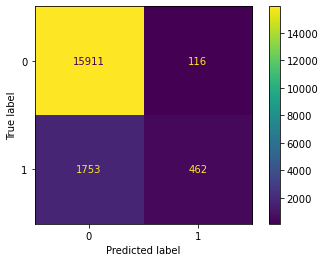

In [18]:
matrix = confusion_matrix(y_val, CV_tree.predict(X_val))
disp = ConfusionMatrixDisplay(matrix)
disp.plot()

## GradientBoostingClassifier

In [19]:
param_grid = {
    'n_estimators': range(60, 101, 10),
    "learning_rate": [0.1, 0.15],
}

boost = GradientBoostingClassifier()
CV_boost = GridSearchCV(estimator=boost, param_grid=param_grid, cv= 5)
CV_boost.fit(X, y)
print(CV_boost.best_params_)

{'learning_rate': 0.15, 'n_estimators': 100}


In [20]:
print("Accuracy score for GradientBoosting: ", accuracy_score(y_val, CV_boost.predict(X_val)))
print("Recall score for GradientBoosting: ", recall_score(y_val, CV_boost.predict(X_val)))
print("F1 score for GradientBoosting", f1_score(y_val, CV_boost.predict(X_val)))

Accuracy score for GradientBoosting:  0.8961188466176955
Recall score for GradientBoosting:  0.21986455981941308
F1 score for GradientBoosting 0.33949111188567443


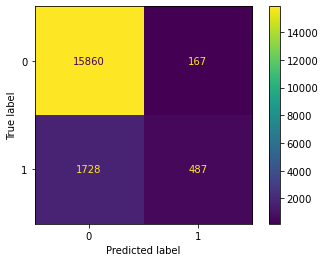

In [21]:
matrix = confusion_matrix(y_val, CV_boost.predict(X_val))
disp = ConfusionMatrixDisplay(matrix)
disp.plot()

_DicisionTree and GradientBossting showed better result, but thet still have quite low recall and f1 scores. I decided to use oversampling method to balance the data. After oversamling the amount of 0 and 1 target values became equal._

## Using Oversampling method to deal with imbalanced data

In [22]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [23]:
X_over, y_over = oversample.fit_resample(X, y)

In [24]:
param_grid = {
    'max_depth': range(3, 10),
    'n_estimators': range(20, 71, 10)
}

rfc = RandomForestClassifier()
CV_rfc_over = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc_over.fit(X_over, y_over)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(3, 10),
                         'n_estimators': range(20, 71, 10)})

In [25]:
print(CV_rfc_over.best_params_)
print("Accuracy score for RandomForest: ", accuracy_score(y_val, CV_rfc_over.predict(X_val)))
print("Recall score for RandomForest: ", recall_score(y_val, CV_rfc_over.predict(X_val)))
print("F1 score for RandomForest", f1_score(y_val, CV_rfc_over.predict(X_val)))

{'max_depth': 9, 'n_estimators': 60}
Accuracy score for RandomForest:  0.7103935971932902
Recall score for RandomForest:  0.61941309255079
F1 score for RandomForest 0.341846268842656


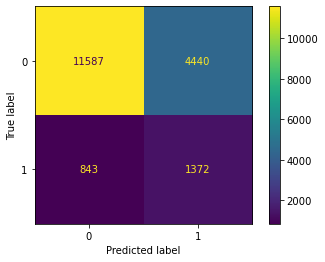

In [26]:
matrix = confusion_matrix(y_val, CV_rfc_over.predict(X_val))
disp = ConfusionMatrixDisplay(matrix)
disp.plot()

In [27]:
param_grid = {
    'max_depth': range(1, 15),
}

tree = DecisionTreeClassifier()
CV_tree_over = GridSearchCV(estimator=tree, param_grid=param_grid, cv= 5)
CV_tree_over.fit(X_over, y_over)
print(CV_tree_over.best_params_)

{'max_depth': 14}


In [28]:
print("Accuracy score for DecisionTree: ", accuracy_score(y_val, CV_tree_over.predict(X_val)))
print("Recall score for DecisionTree: ", recall_score(y_val, CV_tree_over.predict(X_val)))
print("F1 score for DecisionTree", f1_score(y_val, CV_tree_over.predict(X_val)))

Accuracy score for DecisionTree:  0.7287578116434601
Recall score for DecisionTree:  0.5079006772009029
F1 score for DecisionTree 0.3125868296749097


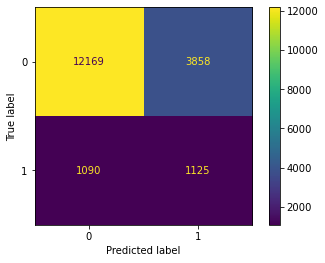

In [29]:
matrix = confusion_matrix(y_val, CV_tree_over.predict(X_val))
disp = ConfusionMatrixDisplay(matrix)
disp.plot()

In [30]:
param_grid = {
    'n_estimators': range(60, 101, 10),
    "learning_rate": [0.1, 0.15],
}

boost = GradientBoostingClassifier()
CV_boost_over = GridSearchCV(estimator=boost, param_grid=param_grid, cv= 5)
CV_boost_over.fit(X_over, y_over)
print(CV_boost.best_params_)

{'learning_rate': 0.15, 'n_estimators': 100}


In [31]:
print("Accuracy score for GradientBoosting: ", accuracy_score(y_val, CV_boost_over.predict(X_val)))
print("Recall score for GradientBoosting: ", recall_score(y_val, CV_boost_over.predict(X_val)))
print("F1 score for GradientBoosting", f1_score(y_val, CV_boost_over.predict(X_val)))

Accuracy score for GradientBoosting:  0.7477250301502029
Recall score for GradientBoosting:  0.5837471783295711
F1 score for GradientBoosting 0.3597662771285476


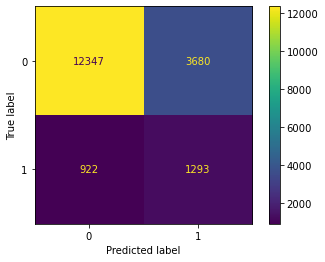

In [32]:
matrix = confusion_matrix(y_val, CV_boost_over.predict(X_val))
disp = ConfusionMatrixDisplay(matrix)
disp.plot()

_After oversamling all models showed lower accuracy, but much higher recall and f1 scores, that's why I decided to make final predictions on the test set using GradientBoostingClassifier, which was fitted on oversampled dataset._

## Preparing test set for submission on Kaggle

In [33]:
ref_id = test["RefId"]
test = test.drop(columns = ["RefId", "PurchDate", "VehYear", "Nationality", "WheelTypeID", "Trim",
                     "SubModel", "Color",'Model', "PRIMEUNIT", "BYRNO", 'VNZIP1', 'VNST', "AUCGUART", 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice'])
test["Transmission"] = test["Transmission"].replace(to_replace = "Manual", value = "MANUAL")
test["Size"] = test["Size"].fillna("MEDIUM")
test["Transmission"] = test["Transmission"].fillna("AUTO")
test["TopThreeAmericanName"] = test["TopThreeAmericanName"].fillna("OTHER")
test = pd.get_dummies(test,prefix=['Auction', "Transmission", "Make", "WheelType", "Size", "TopThreeAmericanName"], columns = ['Auction', "Transmission", "Make", "WheelType", "Size", "TopThreeAmericanName"])

In [35]:
missing_cols = list(set(X.columns) - set(test))
test[[missing_cols]] = 0
test = test.reindex(columns = X.columns)

In [36]:
test = test.fillna(test.mean())

In [37]:
test_pred = CV_boost_over.predict_proba(test)

In [39]:
my_submission = pd.DataFrame({'RefId': ref_id, 'IsBadBuy': test_pred[:, 1]})

In [40]:
my_submission.to_csv("dont2.csv", index=False)

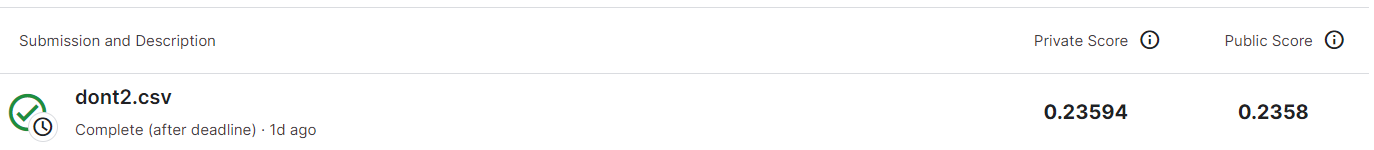

_This result would be on ~150th place out of 570 other submissions_